<a href="https://colab.research.google.com/github/TrevorT04/Learning-ML/blob/main/Breast_Cancer_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
from sklearn.datasets import load_breast_cancer

## Here were are visualizing the data to prepare for preproccesing

In [2]:
visualize_data= load_breast_cancer(as_frame=True)
visualize_data.frame

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [3]:
data, targets = load_breast_cancer(return_X_y=True)
print(f"first instance of data: {data[0]}, \nshape: {data.shape, data[0].shape}, \ndatatype: {type(data), type(data[0]), type(data[0][0])}, \n\nfirst instance of target: {targets[0]}, \nshape:{targets.shape, targets[0].shape}, \ndatatype: {type(targets),type(targets[0])}")

first instance of data: [1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01], 
shape: ((569, 30), (30,)), 
datatype: (<class 'numpy.ndarray'>, <class 'numpy.ndarray'>, <class 'numpy.float64'>), 

first instance of target: 0, 
shape:((569,), ()), 
datatype: (<class 'numpy.ndarray'>, <class 'numpy.int64'>)


## Preproccessing

In [4]:
import torch
data = torch.from_numpy(data).type(torch.float)
targets = torch.from_numpy(targets).type(torch.float)
# I dont know when this became a tensor I think from import ¯\_(ツ)_/
data.dtype, targets.dtype

(torch.float32, torch.float32)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    targets,
                                                    test_size=0.2,
                                                    random_state=42
                                                    )
len(X_train), len(X_test), len(y_train), len(y_test)

(455, 114, 455, 114)

## Building a model


In [6]:
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [7]:
## Model Version 1
class BreastCancerClassifyV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.relu_stack = nn.Sequential(
        nn.Linear(in_features=30, out_features= 90),
        nn.ReLU(),
        nn.Linear(in_features=90, out_features=90),
        nn.ReLU(),
        nn.Linear(in_features=90, out_features=1)
        )

  def forward(self, x):
    return self.relu_stack(x)

In [8]:
model1 = BreastCancerClassifyV1().to(device)
print(model1)

BreastCancerClassifyV1(
  (relu_stack): Sequential(
    (0): Linear(in_features=30, out_features=90, bias=True)
    (1): ReLU()
    (2): Linear(in_features=90, out_features=90, bias=True)
    (3): ReLU()
    (4): Linear(in_features=90, out_features=1, bias=True)
  )
)


In [9]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model1.parameters(), lr=0.001)

In [10]:
def acc_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  return (correct/len(y_pred))*100

In [65]:
import matplotlib.pyplot as plt
import numpy as np

track_loss = []
test_loss_track = []

In [66]:
torch.manual_seed(42)
epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  #forward pass
  y_logits = model1(X_train).squeeze()

  #calc loss
  loss = loss_fn(y_logits, y_train)

  #zero opt
  optimizer.zero_grad()

  #backprop
  loss.backward()

  #step
  optimizer.step()

  ## test
  model1.eval()
  with torch.inference_mode():

    #forward
    test_logits = model1(X_test).squeeze()

    #loss
    test_loss = loss_fn(test_logits, y_test)
    track_loss.append(test_loss.item())
    test_loss_track.append(np.array(track_loss).mean())

    test_acc = acc_fn(y_test, torch.round(torch.sigmoid(test_logits)))

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Test Loss: {test_loss: .5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.14738, Test Loss:  0.12343, Test acc: 94.74%
Epoch: 100 | Loss: 0.15987, Test Loss:  0.13215, Test acc: 92.11%
Epoch: 200 | Loss: 0.14733, Test Loss:  0.12427, Test acc: 94.74%
Epoch: 300 | Loss: 0.16594, Test Loss:  0.13502, Test acc: 92.11%
Epoch: 400 | Loss: 0.14809, Test Loss:  0.12521, Test acc: 93.86%
Epoch: 500 | Loss: 0.16311, Test Loss:  0.13346, Test acc: 92.11%
Epoch: 600 | Loss: 0.14819, Test Loss:  0.12569, Test acc: 93.86%
Epoch: 700 | Loss: 0.16052, Test Loss:  0.13256, Test acc: 92.11%
Epoch: 800 | Loss: 0.14714, Test Loss:  0.12451, Test acc: 93.86%
Epoch: 900 | Loss: 0.16169, Test Loss:  0.13205, Test acc: 92.11%


# Characterizing test loss with a loss curve

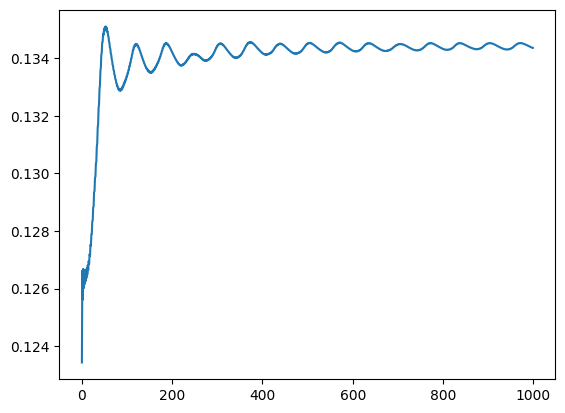

In [67]:
plt.plot(test_loss_track)